### Final Project Submission

1) Student Name: Andrew Reusche
2) Studen Pace: Self Paced
3) Scheduled project review date and time: April 2nd 4:00 pm
4) Instructor: Mark Barbor

# Automating Tweet Sentiment Classification via Natural Language Processing (NLP)

Author: Andrew Reusche

## Project Summary 

#### Business and Data Understanding
My project aims to cut down the time our marketing team spends manually searching for positive product tweets by automating sentiment classification with Machine Learning and Natural Language Processing. To train my model, I will be using a dataset containing roughly 9,000 real tweets, where each tweet has already been classified as having a “Positive” (2,970 instances) or "Neutral/Negative" (6,100 instances) sentiment. This sentiment-rich text data is well-suited for NLP and is reflective of real customer opinions, enabling my team to engage with the tweets effectively.

#### Data Preparation
Tweets can be messy, containing hashtags, links, and other text that doesn’t directly convey sentiment. To help strip these tweets of unnecessary data, I experimented with Regular Expressions to clean the text, Stop Words to get rid of unnecessary words, N-Grams to string together multiple words for enhanced meaning, and TF-IDF Vectorization to filter out rare/ overly common words and convert the text into numerical features that our classification models can interpret.

#### Modeling
I used libraries like SKLearn and XG-Boost for modeling and testing classifiers, including Multinomial Naive Bayes, Logistic Regression, XG Boost, Linear SVC, Random Forest, Gradient Boosting, and MLP Classifier. Each model was trained and tuned on training and validation data subsets, with five-fold hyperparameter GridSearchCVs optimized to maximize accuracy.

#### Evaluation
I ended up using a tuned Linear SVC on a testing data holdout to simulate the model’s effectiveness on new tweets, and the model performed fairly well with an accuracy of 74.1% (correctly classifying 661 out of 892 tweets). However, its recall and precision for the “Positive” class were 55% and 62%, indicating that a sizable amount of “Positive” tweets were missed, and not “Positive” tweets were included.  This model can successfully decrease the amount of time our marketing team needs to spend sifting through tweets but is not yet good enough to fully eliminate human oversight of sentiment classification.

## Business Problem

Can tweets be automatically analyzed to extract emotional sentiment?

Our marketing company has been hired by a tech firm to come up with new marketing ideas about the products they represent. The tech firm would like to see if tweets about their products can be used in a useful manner to help their business grow. To help achieve this, our company will be analyzing recent tweets about these tech lines (Google and Apple) in an attempt to extract insights on how and what people are currently feeling about these products. 

My team has specifically been tasked with finding tweets where people have been talking about these products in a positive light. Once the positive sentiment tweets are separated from the others, they will be sent over to the marketing team, where they can be analyzed further in an attempt to extract new marketing strategies.

Up until now, our marketing team has been individually reading tweets about these products, and manually classifying their emotional sentiment one at a time. The process of manually doing this is very time-consuming, mind-numbing, and costly for our marketing company. To free up our marketing team's time and resources, I will create a model that automatically classifies the emotional sentiment of the tweets. This will significantly reduce the amount of time the marketing department has to spend sifting through tweets to find ones with positive emotional sentiment. 

### Metric of Success

In this case, the marketing team has stated that it is just as important to minimize the amount of tweets falsely categorized as positive as it is to minimize the amount of tweets falsely categorized as negative. In other words, they would like to miss out on as few potential new marketing angles as possible without wasting too much time accidentally pursuing topics that people actually dislike. Being that minimizing false positives (precision) is just as important as minimizing false negatives (recall), we will use accuracy as the metric of success since it gives us a score of the overall correctly classified tweets. 

## Data Understanding

### Data Source and Data Use:

Source: "Brands and Product Emotions" Data World, CrowdFlower, 2016, https://data.world/crowdflower/brands-and-product-emotions

To simulate a corpus of tweets the marketing team has compiled for sentiment analysis, I will be using the "Brands and Product Emotions" dataset from CrowdFlower's Data World repository (cited above). 

This dataset contains almost 9,100 real tweets centered around various Apple/Google products, and marked for emotional sentiment. These tweets have already been presented to people for manual classification into one (1) of four (4) emotional sentiment categories:

    1) No Emotion toward brand or product
    2) Positive Emotion
    3) Negative Emotion
    4) I can't tell

I will be using the Tweet column to try to predict the Emotion class column, and more specifically, which tweets carry a positive emotion or sentiment. After all the "I can't tell" instances are dropped, the Emotion column will be manipulated to create a new column called Sentiment that will tell us if each tweet has a positive sentiment (denoted by 1) or does not have a positive sentiment (denoted by 0), enabling us to use a One-Vs-All classification.

I will use Natural Language Processing (NLP) to clean, tokenize, and manipulate each tweet so that the maximum amount of useful information can be extracted from each one in an attempt to predict sentiment classification. 

### Data Limitations

There are some limitations to this dataset that I would like to note:

    1. Without physically going through each of these tweets one by one and confirming their classification, we are only operating under the assumption that each of these human-made classifications is correct. 

    2. This data set is relatively small, containing only roughly 9,100 tweets. This may hinder Machine Learning and Natural Language Processing from fully capturing the diversity of language and sentiment that people regularly use. 
    
    3. Only about 30% of the tweets in this dataset are marked for "positive" sentiment. This may cause the model to be biased towards predicting "not positive", and may hinder it from fully understanding all the ways humans can project "positive" sentiment in a tweet. 

    4. This data is centralized around a few very specific topics and time periods, so it may not be great at generalizing about tweets that are outside of this topic and timeframe. 

## Bring in the data and preview it

Import the relevant libraries needed to help us import, manipulate, and analyze the data.

In [1]:
#general libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import re
import seaborn as sns

#hide warning messages that may pop up obscuring notebook view
import warnings
warnings.filterwarnings('ignore')

#NLP libraries
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

#Machine Learning libraries
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#model evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

#preprocessing and pipeline libraries
from sklearn.pipeline import Pipeline

#other libraries
from collections import Counter

Pull in the data from a .CSV file and convert it to a DataFrame.

In [2]:
#pull in the data 
df= pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
#preview the data
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Preview the details of the dataset. Here we see that it is a smaller dataset with only roughly 9,100 tweets. In this analysis, we only care about the tweets and their associated sentiment, so we will be dropping the subject matter column ("emotion_in_tweet_is_directed_at") since it is missing 2/3rds of it's values and isn't relveant to our current scope.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [5]:
#save the relevant tweet annd emotion columns as a new DataFrame
raw_df= df[['tweet_text','is_there_an_emotion_directed_at_a_brand_or_product']]
#drop the 1 row missing tweet data
raw_df= raw_df.dropna()
#drop and duplicate rows
raw_df = raw_df.drop_duplicates(keep='first')
#rename the columns with simple meaningful names
raw_df = raw_df.rename(columns={'tweet_text': 'tweet', 
                                'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'})

#inspect the emotional sentiment distrobution
raw_df['emotion'].value_counts(normalize= True)

emotion
No emotion toward brand or product    0.592613
Positive emotion                      0.327453
Negative emotion                      0.062734
I can't tell                          0.017200
Name: proportion, dtype: float64

In [6]:
raw_df['emotion'].value_counts(normalize= False)

emotion
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

Since our goal is to predict if a tweet has a positive sentiment or not, after dropping the "I can't tell" rows that only take up ~2% of the data, we will merge the "Negative emotion" sentiment with the "No emotion toward brand or product" sentiment in a new column called Emotion. This new column will show "1" when the tweet's sentiment is Positive, and will show "0" when the tweet's sentiment is anything else. This will enable us to use One-vs-all classification when predicting if a tweet shows a positive sentiment.

In [7]:
#create a new dataframe excluding all instances of "I can't tell"
rel_raw_df = raw_df[raw_df['emotion'] != "I can't tell"]

#create a new column "sentiment" showing 1 for instances of positive emotion 
#and 0 for all other 
sentiment_map = {'No emotion toward brand or product': 0,
    'Positive emotion': 1,
    'Negative emotion': 0}
rel_raw_df['sentiment'] = rel_raw_df['emotion'].map(sentiment_map)

#preview the updated sentiment distrobution
rel_raw_df['sentiment'].value_counts(normalize= True)

sentiment
0    0.666816
1    0.333184
Name: proportion, dtype: float64

This imbalance could skew model performance, particularly with accuracy as our metric. A model that always predicts the majority class (0, "not positive") would still achieve ~66% accuracy, potentially overlooking many true positive instances. This risks missing valuable marketing insights, which conflicts with our goal.

To address this, I experimented with SMOTE (Synthetic Minority Oversampling Technique) and Random-Undersampling in exploratory notebooks. Surprisingly, both methods reduced model accuracy by 6-10% across various algorithms. I hypothesize that may be due to:

    1. SMOTE’s synthetic "positive" samples failed to capture the complex language of genuine positive tweets, introducing noise rather than value.

    2. Random undersampling discarded too much of the majority class, stripping away key patterns that distinguish "not positive" from "positive" sentiment.

Given these findings and our focus on maximizing accuracy (balancing false positives and false negatives), I am currently keeping the original imbalanced dataset. If the success metric changes down the line (prioritizing recall for positive tweets), this imbalance should be revisited and improved upon.

## Data Preprocessing and Exploration

### Data Preprocessing 

Currently, these tweets are in raw form and contain a lot of unstructured or useless text (usernames, hashtags, links, other special characters) that does not directly relate to the sentiment of the overall tweet. To help my models more accurately predict the sentiment of these tweets, and avoid the garbage in garbage out trope, we will be stripping these tweets down to their most useful informative tokens for NLP analysis, while trying to preserve the maximum amount of sentiment-relevant content.

Make sure that words like "Love" and "love" are counted as the same token. 

In [8]:
#lower case all the twet text to remove un-needed noise
rel_raw_df["tweet"] = rel_raw_df["tweet"].str.lower()
rel_raw_df[:10]

,tweet,emotion,sentiment
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,Negative emotion,0
1,@jessedee know about @fludapp ? awesome ipad/i...,Positive emotion,1
2,@swonderlin can not wait for #ipad 2 also. the...,Positive emotion,1
3,@sxsw i hope this year's festival isn't as cra...,Negative emotion,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Positive emotion,1
5,@teachntech00 new ipad apps for #speechtherapy...,No emotion toward brand or product,0
7,"#sxsw is just starting, #ctia is around the co...",Positive emotion,1
8,beautifully smart and simple idea rt @madebyma...,Positive emotion,1
9,counting down the days to #sxsw plus strong ca...,Positive emotion,1
10,excited to meet the @samsungmobileus at #sxsw ...,Positive emotion,1


Get rid of tweets that have too much nonsense in them.

In [9]:
#9092 is a nonsensical symbolized tweet, drop it
"""
'\x8cï¡\x8eïà\x8aü_\x8b\x81ê\x8b\x81î\x8b\x81ò\x8b\x81£\x8b
\x81á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bûârt 
@mention google tests \x89ûïcheck-in offers\x89û\x9d at 
#sxsw {link}'
"""

rel_raw_df= rel_raw_df.drop(9092)

Remove hashtags and usernames that add no value to sentiment.

In [10]:
#removing usernames
rel_raw_df["tweet"]= rel_raw_df["tweet"].apply(lambda x : ' '.join(
    [w for w in x.split() if '@' not in w]).strip())

#removing hashtags
rel_raw_df["tweet"]= rel_raw_df["tweet"].apply(lambda x : ' '.join(
    [w for w in x.split() if '#' not in w]))

Use regular expressions (ReGex) to strip out remaining unwanted characters and standardize/tokenize the text.

In [11]:
#use ReGex to strip the tweets down to only what I want
def strip_token(tweet):
    tweet = re.sub(r'http[s]?://\S+|www\.\S+', '', tweet) #remove all links form tweets
    tweet = re.sub(r'&amp;', 'and', tweet) #convert all instances of '&amp' to 'and'
    tweet = re.sub(r"'", "", tweet) #removes " ' " converting "can't" to "cant"
    tweet = re.sub(r'_', ' ', tweet) #removes all '_' from tweets
    tweet = re.sub(r'[^\w\s]', ' ', tweet) #removes all non word characters from tweets
    tweet = re.sub(r'\d+\w*', '', tweet) #removes all numbers or character combinations that begin with numbers 
    tweet = re.sub(r'can not', "cant", tweet) #convert all instances of 'can not' to 'cant'
    tweet = re.sub(r'will not', "wont", tweet) #convert all instances of 'will not' to 'wont'
    tweet = re.sub(r'do not', "dont", tweet) #convert all instances of 'do not' to 'dont'
    tweet = re.sub(r'\b[^a-zA-Z]+', ' ', tweet) #should strip all non standard a-z characters left over 
    tokens = word_tokenize(tweet)
    return tokens

#create a new column with the cleaned and tokenized tweets
rel_raw_df['tweet_tokenized'] = rel_raw_df['tweet'].apply(strip_token)

#preview dataset
rel_raw_df[['sentiment', 'tweet_tokenized']]

,sentiment,tweet_tokenized
0,0,"[i, have, a, iphone, after, hrs, tweeting, at,..."
1,1,"[know, about, awesome, ipad, iphone, app, that..."
2,1,"[cant, wait, for, also, they, should, sale, th..."
3,0,"[i, hope, this, years, festival, isnt, as, cra..."
4,1,"[great, stuff, on, fri, marissa, mayer, google..."
...,...,...
9087,0,"[yup, but, i, dont, have, a, third, app, yet, ..."
9088,1,"[ipad, everywhere, link]"
9089,0,"[wave, buzz, rt, we, interrupt, your, regularl..."
9090,0,"[googles, zeiger, a, physician, never, reporte..."


Break complex or variant words down to their root form. Example [running, ran, runs] will all become one token [run] instead of three different tokens. 

In [12]:
#lemmetize the tokens
lemmatizer = WordNetLemmatizer()

def lem_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

rel_raw_df['tweet_lem'] = rel_raw_df['tweet_tokenized'].apply(lem_tokens)

### Data Exploration

In order to avoid data leakage and overfitting our models on our data I will now break this Dataframe down into Train, Validation, and Test subsets. I will use 80% of the data to train the model, holding 10% of the data aside for validation (hyper-parameter tuning) and 10% aside for a final holdout to evaluate our last model on. 

I will then explore the token distributions in the training set to understand the language patterns associated with each sentiment class. This will help me identify key tokens and potentially refine my preprocessing (stopword removal) to improve model performance.

In [13]:
#define features (tweets) and target class (sentiment)
X= rel_raw_df['tweet_lem']
y= rel_raw_df['sentiment']

#Train/remain split ("remain" is the remaining data)
X_train, X_remain, y_train, y_remain= train_test_split(X, y, 
                                                   test_size= 0.2,  
                                                   random_state= 24)

#Val/test split 
X_val, X_test, y_val, y_test= train_test_split(X_remain, y_remain,
                                               test_size= 0.5, 
                                               random_state= 24)

Here I will explore the most frequest tokens used for each sentiment class to see if I can spot any common language patterns.

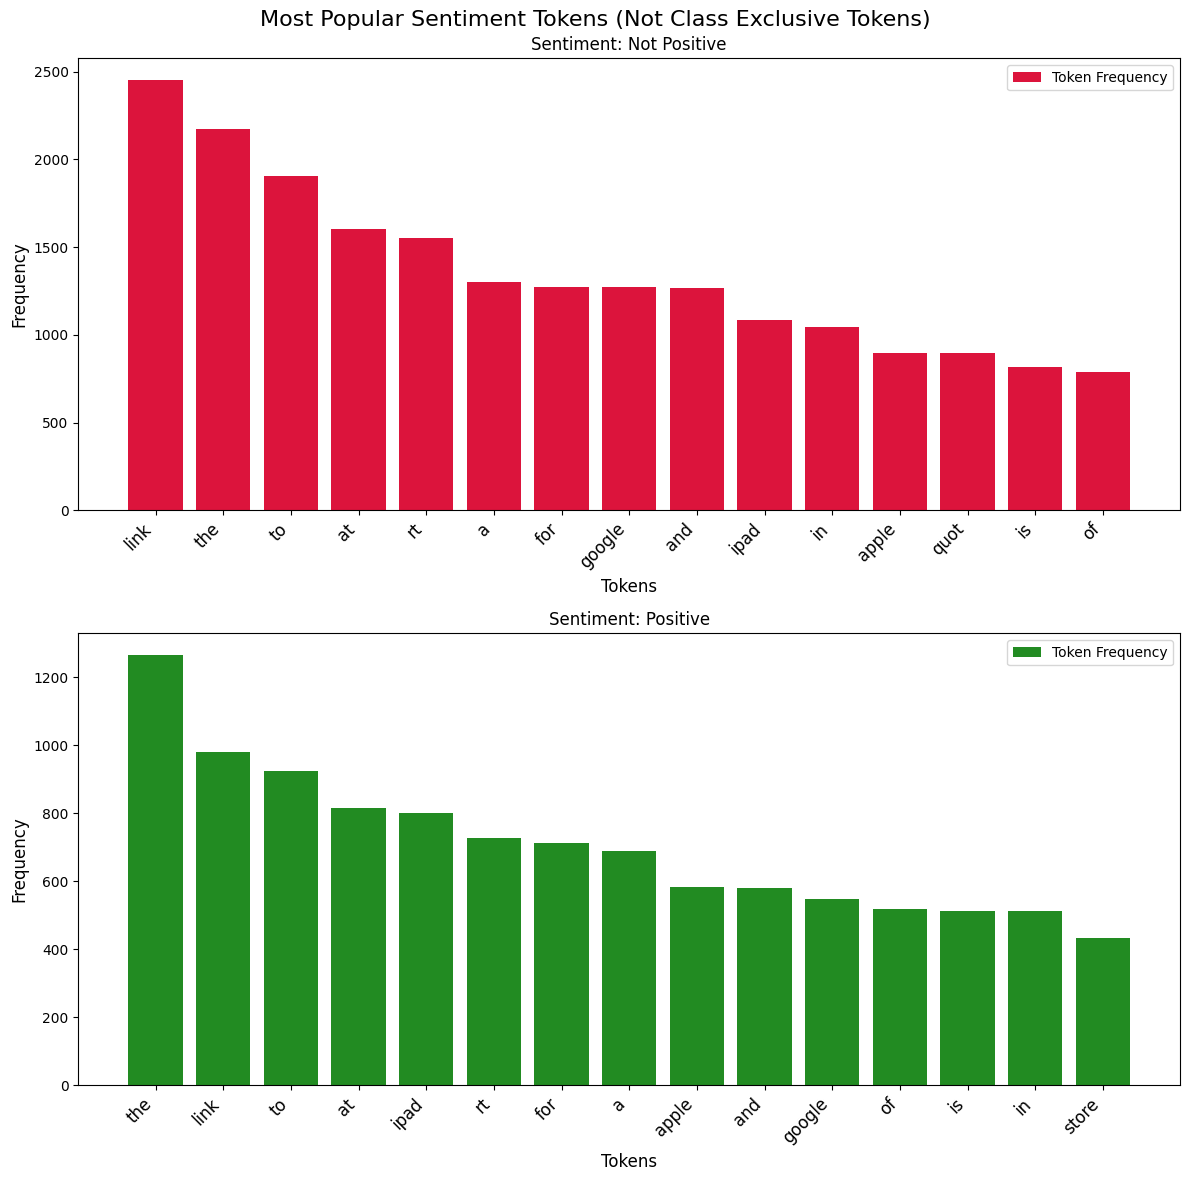

In [14]:
#set up subplots for visualization
fig, axes = plt.subplots(nrows=2, figsize=(12, 12))

#define colors and labels for each sentiment class
sentiment_colors = {0: 'crimson', 1: 'forestgreen'}
sentiment_labels = {0: 'Not Positive', 1: 'Positive'}

#define the senitment classes
sentiment_classes = sorted(y_train.unique())

#Plot the 15 most common tokens for each sentiment class
for i, sentiment_class in enumerate(sentiment_classes):
    #grab the tokens from each sentiment class
    sentiment_data = X_train[y_train == sentiment_class]
    all_words_in_sentiment = [word for tokens in sentiment_data for word in tokens]
    top_15 = Counter(all_words_in_sentiment).most_common(15)  

    #create a bar plot for each sentiment class
    ax = axes[i]
    words, counts = zip(*top_15) if top_15 else ([], [])
    ax.bar(words, counts, color=sentiment_colors[sentiment_class], label='Token Frequency')
    ax.set_title(f'Sentiment: {sentiment_labels[sentiment_class]}')
    ax.set_xticklabels(words, rotation=45, ha='right', fontsize= 12)
    ax.set_xlabel('Tokens', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc='best', fontsize=10)

#add overall title to this plot
fig.suptitle('Most Popular Sentiment Tokens (Not Class Exclusive Tokens)', fontsize=16)
fig.tight_layout()

From these graphs, we can tell that both classes share many frequent tokens, and that a lot of these tokens are regular stop words like [the, to, at, for...] or non-sentiment-specific topic words like [apple, ipad, or google]. Due to this, I hypothesize that removing these words may clear up the difference between the tweets with a positive sentiment and the tweets without a positive sentiment. 

In an attempt to see how the tweets look without these overlapping words/ stop words, let's take a look at another sentiment token frequency graph that only shows tokens that are unique to each sentiment class. I hypothesize that this will reveal words that are more predictive of sentiment.

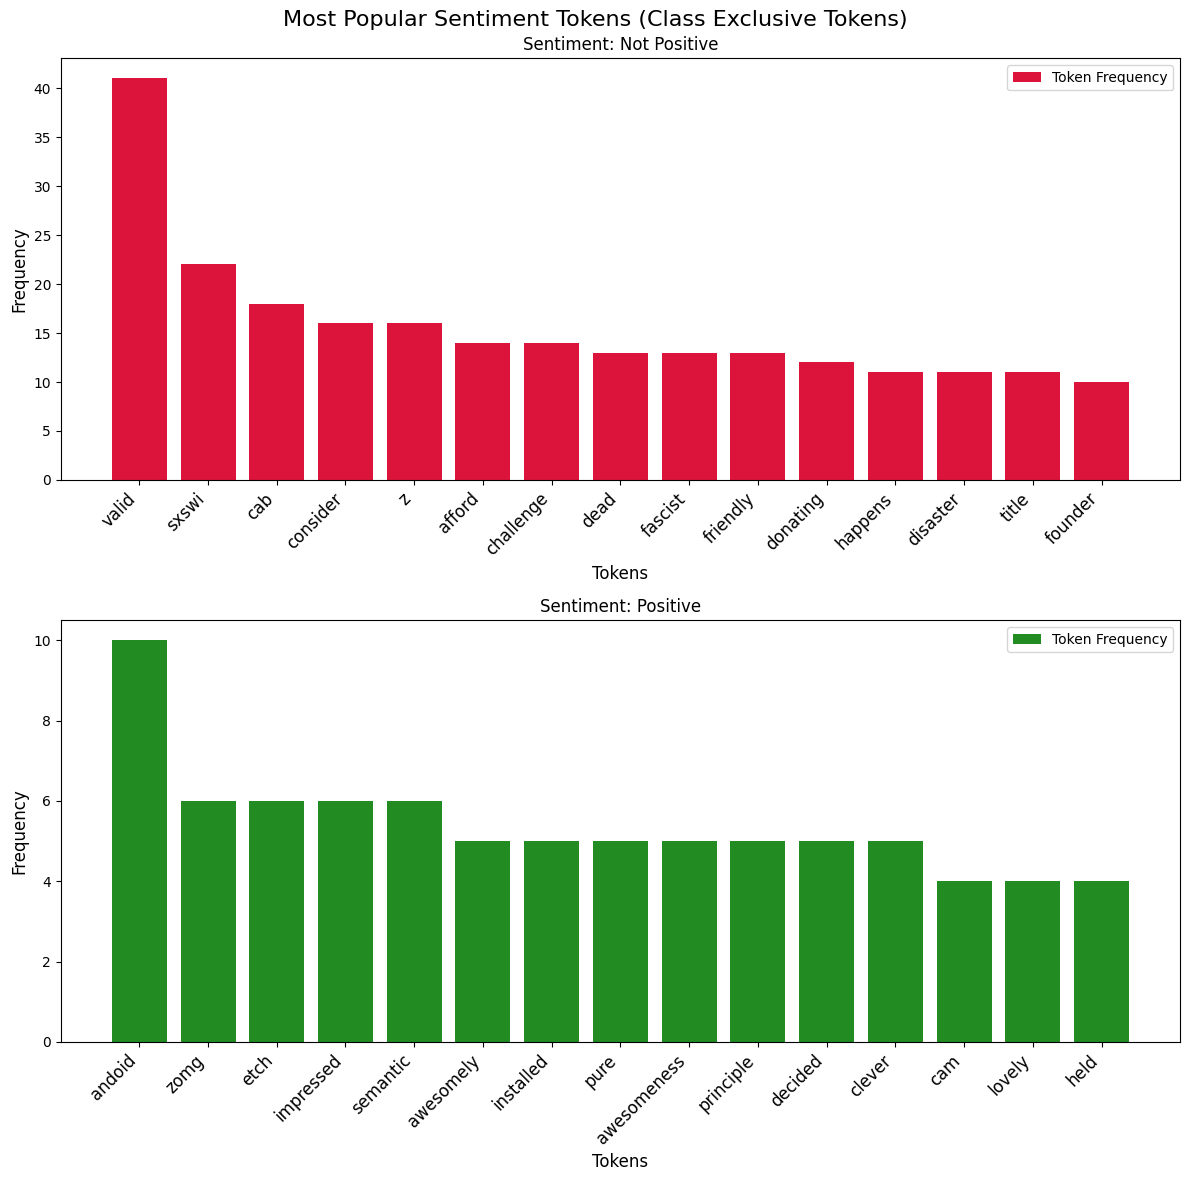

In [15]:
#set up subplots for visualization
fig, axes = plt.subplots(nrows=2, figsize=(12, 12))

#define colors and labels for each sentiment class
sentiment_colors = {0: 'crimson', 1: 'forestgreen'}
sentiment_labels = {0: 'Not Positive', 1: 'Positive'}

#define the senitment classes
sentiment_classes = sorted(y_train.unique())

#grab the tokens from each sentiment class
words_by_sentiment = {}
for sentiment_class in sentiment_classes:
    sentiment_data = X_train[y_train == sentiment_class]
    all_words_in_sentiment = [word for tokens in sentiment_data for word in tokens]
    words_by_sentiment[sentiment_class] = set(all_words_in_sentiment)

#filters the tokens out to ones that are unique for each class
unique_words_by_sentiment = {}
for sentiment_class in sentiment_classes:
    other_classes = [s for s in sentiment_classes if s != sentiment_class]
    other_words = set()
    for other_class in other_classes:
        other_words.update(words_by_sentiment[other_class])
    unique_words = words_by_sentiment[sentiment_class] - other_words
    unique_words_by_sentiment[sentiment_class] = unique_words

#Plot the 15 most common tokens for each sentiment class
for i, sentiment_class in enumerate(sentiment_classes):
    sentiment_data = X_train[y_train == sentiment_class]
    all_words_in_sentiment = [word for tokens in sentiment_data for word in tokens]
    unique_words_in_sentiment = [word for word in all_words_in_sentiment if word in unique_words_by_sentiment[sentiment_class]]
    top_15 = Counter(unique_words_in_sentiment).most_common(15)

    #create a bar plot for each sentiment class
    ax = axes[i]
    words, counts = zip(*top_15) if top_15 else ([], [])
    ax.bar(words, counts, color=sentiment_colors[sentiment_class], label='Token Frequency')
    ax.set_title(f'Sentiment: {sentiment_labels[sentiment_class]}')
    ax.set_xticklabels(words, rotation=45, ha='right', fontsize= 12)
    ax.set_xlabel('Tokens', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc='best', fontsize=10)

#add overall title to this plot
fig.suptitle('Most Popular Sentiment Tokens (Class Exclusive Tokens)', fontsize=16)
fig.tight_layout()

This graph shows us that removing all the overlapping words and stop words is a double-edged sword. On the positive side of things, it gets rid of a lot of the words like "google" that don't blatantly point to one sentiment or the other, and highlights words like "rad" or "clever" that clearly point to a positive sentiment. On the downside, removing all these words shows that these tweets are highly unique, with the most common positive token "andoid" only appearing in 10 out of the 2,371 positive sentiment tweets in X_train. With the combination of a low positive tweet count and a sparse commonality of tokens unique to the positive class, removing these overlapping stop words may make it very difficult for some models to generalize to new tweets. 

Due to this, instead of outright removing the stopwords and overlapping words, we will create a list of potential words to be removed that models can choose to remove or not to remove, like a hyperparameter when trying to maximize accuracy.

In [16]:
#the first stop words list is the standard English stopwords list minus ['not', and 'can']
stopwords_list= stopwords.words('english')
stopwords_list = [word for word in stopwords_list if word not in ['not', 'can']]

#the second stop words list adds these common, seemingly sentiment-free words to the previous list
additional_stopwords= ['google', 'iphone', 'ipad', 'link', 'apple', 'rt', 'store', 'quot', 'austin', 'via', 'sxsw']
stopwords_list2= stopwords_list + additional_stopwords

## Model Building and Data Analysis

Now that my tweets have been cleaned and preprocessed, I am ready to vectorize them and put them through classification models to see if Positive Sentiment tweets can be automatically and accurately categorized without the need for constant human oversight. I will be pairing TF-IDF Vectorization with different Machine Learning Classification models to maximize the accuracy of this sentiment classification. I will specifically be training these models on the X_train data, and tuning their hyperparameters on the X_val data to see how well it generalize to unseen tweets. 

Before this tweet data can be passed into the Machine Learning classification models the cleaned tweet tokens have to be transformed into numbers so that can understand what they are reading. I am making this transformation by passing the tweets into the TF-IDF Vectorizer. This specific vectorizer was chosen because it helps identify how important each word is in a specific tweet compared to the whole collection of tweets. In order for the vectorizer to succesfully guage each word's importance the the tokens have to first be turned back into full strings. 

In [17]:
 # Join token lists into strings
X_train_str = X_train.apply(' '.join)
X_val_str = X_val.apply(' '.join)
X_test_str = X_test.apply(' '.join)

#show an example of this transformation
print(f"X_train Example: {X_train[0]}\n")
print(f"X_train_str Example: {X_train_str[0]}") 

X_train Example: ['i', 'have', 'a', 'iphone', 'after', 'hr', 'tweeting', 'at', 'it', 'wa', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'station', 'at']

X_train_str Example: i have a iphone after hr tweeting at it wa dead i need to upgrade plugin station at


### Baseline Model - Multinomial Naive Bayes

I start with an untuned Multinomial Naive Bayes (MNB) model as a baseline to establish initial performance metrics. This model is paired with TF-IDF Vectorization in a pipeline for streamlined processing.

#### Un-Tuned Multinomial Niave Bayes

Baseline Train Cross-Validation Score (MultinomialNB): 0.6979
Baseline Validation Set Accuracy (MultinomialNB): 0.7228

Classification Report (Baseline Naive Bayes Model):
              precision    recall  f1-score   support

Not Positive       0.72      0.97      0.83       610
    Positive       0.75      0.18      0.29       281

    accuracy                           0.72       891
   macro avg       0.74      0.58      0.56       891
weighted avg       0.73      0.72      0.66       891



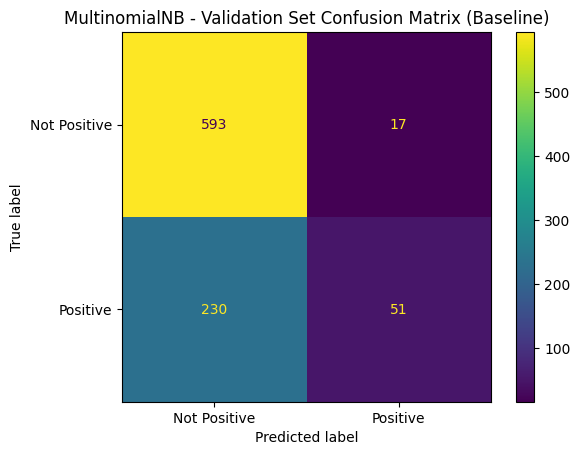

In [18]:
#defines the baseline pipeline 
baseline_MNB_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()), #converts text to TF-IDF Features
    ('mnb', MultinomialNB())])    # applies the Multinomial Naive Bayes Classifier

#fits the model on the training data
baseline_MNB_pipe.fit(X_train_str, y_train)

#predicts sentiment on the validation set
y_val_pred = baseline_MNB_pipe.predict(X_val_str)

#calculates accuracy on the validation set
BMNB_val_accuracy = accuracy_score(y_val, y_val_pred)

#performs 5-fold cross-validation on the training data 
baseline_MNB_train_cv_score = cross_val_score(baseline_MNB_pipe, X_train_str, y_train, cv=5, scoring='accuracy').mean()

#display the Baseline Model's results
print(f"Baseline Train Cross-Validation Score (MultinomialNB): {baseline_MNB_train_cv_score:.4f}")
print(f"Baseline Validation Set Accuracy (MultinomialNB): {BMNB_val_accuracy:.4f}")

#display the Model's classification report
print("\nClassification Report (Baseline Naive Bayes Model):")
print(classification_report(y_val, y_val_pred, target_names=['Not Positive', 'Positive']))

#generate and display the Baseline Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
BMNB_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
BMNB_matrix.plot()
plt.title("MultinomialNB - Validation Set Confusion Matrix (Baseline)")
plt.show()

The baseline Multinomial Naive Bayes model earned a validation accuracy of 72.28%, but its performance is heavily skewed toward the majority class ("Not Positive"). It struggles to identify "Positive" tweets, with a low recall (0.18) and F1-score (0.29) for the "Positive" class. This suggests the model is not yet suitable for automated sentiment classification without human oversight. Addressing class imbalance, tuning hyperparameters, and experimenting with alternative models or features could help improve these scores. 

To help increase our chances of creating a model with an improved accuracy score and decreased need for human oversight, I will be running a hyperparameter grid search on TF-IDF Vectorizer and the Classification model to see which parameter values lead to the greatest increase in classification accuracy. Because grid searches can become computationally expensive and time-consuming, I have watered down the grid searches to show functionality instead of the full searches previously run in other exploratory notebooks. For the sake of transparency I have commented the full search above each of the parameter lines.

#### Multinomial Niave Bayes Grid Search

Previous Best Model Results: Baseline Multinomial Naive Bayes
Baseline Train Cross-Validation Score: 0.6979
Baseline Validation Set Accuracy: 0.7228



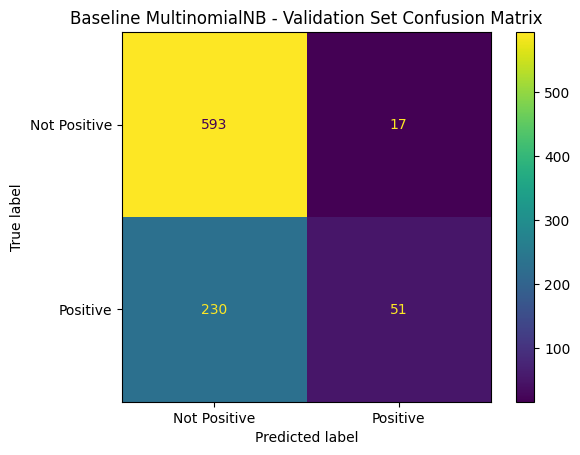

___VS___

Tuned Multinomial Niave Bayes Model Results
Best Multiple Niave Bayes Hyperparameters: {'mnb__alpha': 0.1, 'mnb__fit_prior': True, 'tfidf__max_df': 0.85, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None, 'tfidf__sublinear_tf': True}

Tuned  Multiple Niave Bayes Train Cross-Validation Score: 0.7156
Tuned Validation Set Accuracy: 0.7553


Classification Report (Tuned Naive Bayes Model):
              precision    recall  f1-score   support

Not Positive       0.77      0.91      0.84       610
    Positive       0.68      0.42      0.52       281

    accuracy                           0.76       891
   macro avg       0.73      0.66      0.68       891
weighted avg       0.74      0.76      0.74       891



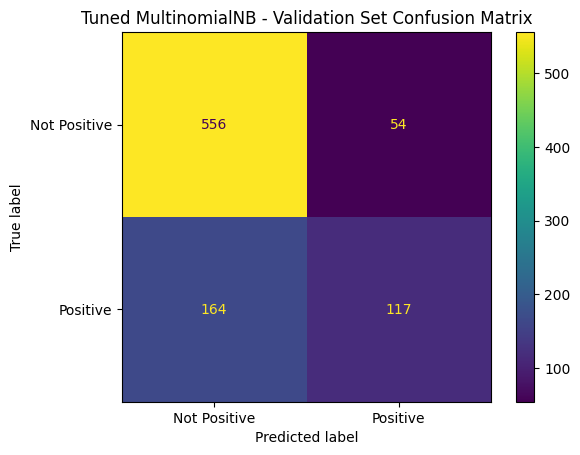

In [19]:
#defines the Hyper Parameter Tuning Multinomial Naive Bayes pipeline 
MNB_pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB())])

#make a parameter grid for the Multinomial Naive Bayes hyperparameter options
MNB_param_grid1 = {
    #[2000, 2500, 3000, 3500, 4000]
    'tfidf__max_features': [1000, 2000],                 #limits the number of features
    #[(1, 1), (1,2), (1,3), (1,5)]
    'tfidf__ngram_range': [(1,1), (1,2)],                #use ungrams or unigrams + bigrams
    #[0.0, 0.1, 0.01, 0.001, 0.0001]
    'tfidf__min_df': [0.01, 0.001,],                     #ignore terms appearing in fewer documents
    #[0.85, 0.95, 1.0]
    'tfidf__max_df': [0.85, 0.95],                       #ignore terms appearing in too many documents
    #[stopwords_list, stopwords_list2, 'english', None]
    'tfidf__stop_words': [None, stopwords_list],         #include of explude stopwords
    'tfidf__sublinear_tf': [True, False],                #apply sublinear TF scaling
    #[0.01, 0.1, 0.5, 1.0, 2.0]
    'mnb__alpha': [0.1, 0.01],                           #smoothing parameter
    'mnb__fit_prior': [True, False]}                     #learn class priors or assume uniform priors

    
#run a grid search to find the most accurate vectorization and model version
MNB_grid_search1 = GridSearchCV(
    MNB_pipeline1,
    MNB_param_grid1,
    cv=5,                  #performs 5-fold cross-validation
    scoring='accuracy',    #optimizes for accuracy
    n_jobs=1,
    verbose=0)

#fits the model on the training data
MNB_grid_search1.fit(X_train_str, y_train)

#performs 5-fold cross-validation on the training data
MNB_best_train_cv_score = MNB_grid_search1.best_score_

#gets best cross-validation model
MNB_best_model = MNB_grid_search1.best_estimator_

#predicts sentiment on the validation set
y_val_pred = MNB_best_model.predict(X_val_str)

#calculates accuracy on the validation set
MNB_val_accuracy = accuracy_score(y_val, y_val_pred)

#gets the best hyperparameter values for the highest accuracy
MNB_best_params = MNB_grid_search1.best_params_

#display the previous best Model's results
print("Previous Best Model Results: Baseline Multinomial Naive Bayes")
print(f"Baseline Train Cross-Validation Score: {baseline_MNB_train_cv_score:.4f}")
print(f"Baseline Validation Set Accuracy: {BMNB_val_accuracy:.4f}\n")

#generate and display the previous best Model's confusion Matrix
BMNB_matrix.plot()
plt.title("Baseline MultinomialNB - Validation Set Confusion Matrix")
plt.show()

print("___VS___\n")

#display this tuned Model's results
print("Tuned Multinomial Niave Bayes Model Results")
print(f"Best Multiple Niave Bayes Hyperparameters: {MNB_best_params}\n")
print(f"Tuned  Multiple Niave Bayes Train Cross-Validation Score: {MNB_best_train_cv_score:.4f}")
print(f"Tuned Validation Set Accuracy: {MNB_val_accuracy:.4f}\n")

#display the Model's classification report
print("\nClassification Report (Tuned Naive Bayes Model):")
print(classification_report(y_val, y_val_pred, target_names=['Not Positive', 'Positive']))

#generate and display the tuned Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
Tuned_MNB_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
Tuned_MNB_matrix.plot()
plt.title("Tuned MultinomialNB - Validation Set Confusion Matrix")
plt.show()

The tuned Multinomial Naive Bayes model outperformed the baseline Multinomial Naive Bayes model. The tuned MNB model improved the validation accuracy score from 0.7228 to 0.7533 and significantly boosted the recall from 0.18 to 0.42. The F1-score also increased from 0.29 to 0.52 for the "Positive" class. This new tuned MNB model is more effective at detecting positive sentiment than its baseline model, though it sacrifices some precision (0.75 to 0.68) and still misses the majority of the "Positive" tweets (164 false negatives). 

Since the hyperparameter tuning successfully increased the model's overall performance, I will compare it to other well-known classification models and hyperparameter-tune them (via accuracy-optimized grid search) as well. The best overall model will then be run on "test" hold-out data to simulate how the model would run on new tweets in the future.

The other classification models we will compare this tuned Multinomial Naive Bayes model to are as follows:

    1) Logistic Regression
    2) XG Boost
    3) Linear SVC
    4) Random Forest
    5) Gradient Boosting 
    6) MLP Classifier

### Logistic Regression

#### Logistic Regression Grid Search

Previous Best Model Results: Tuned Multinomial Naive Bayes
Tuned  Multiple Niave Bayes Train Cross-Validation Score: 0.7156
Tuned Validation Set Accuracy: 0.7553



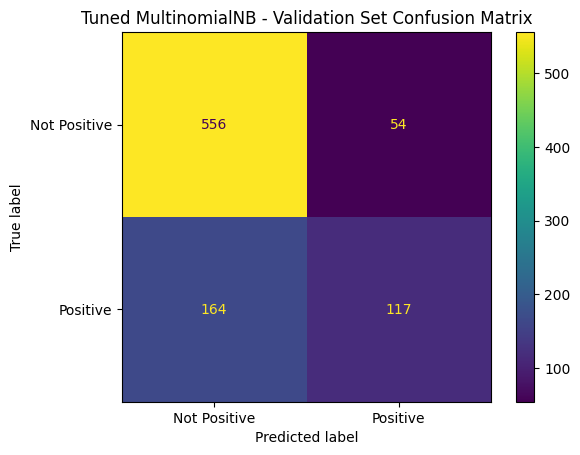

___VS___

Tuned Logistic Regression Model Results
Logistic Regression Best Hyperparameters: {'lr__C': 1, 'lr__class_weight': None, 'lr__fit_intercept': True, 'lr__solver': 'lbfgs', 'lr__tol': 1e-05, 'tfidf__max_df': 0.85, 'tfidf__max_features': 3500, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english', 'tfidf__sublinear_tf': True}
Tuned Logistic Regression Train Cross-Validation Score: 0.7296
Validation Set Accuracy: 0.7542


Classification Report (Tuned Logistic Regression Model):
              precision    recall  f1-score   support

Not Positive       0.77      0.91      0.84       610
    Positive       0.68      0.41      0.51       281

    accuracy                           0.75       891
   macro avg       0.73      0.66      0.67       891
weighted avg       0.74      0.75      0.73       891



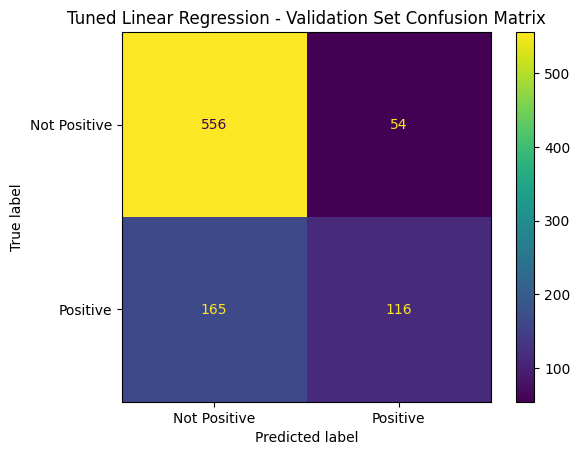

In [20]:
#defines the Hyper Parameter Tuning Logistic Regression pipeline 
LR_pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(random_state=24))])

#make a parameter grid for the Logistic Regression hyperparameter options
LR_param_grid1 = {
    #[2000, 2500, 3000, 3500, 4000]
    'tfidf__max_features': [2000, 3500],
    #[(1, 1), (1,2), (1,3), (1,5)]
    'tfidf__ngram_range': [(1,2), (1,3)],
    #[0.0, 0.1, 0.01, 0.001, 0.0001]
    'tfidf__min_df': [0.0, 1],
    #[0.85, 0.95, 1.0]
    'tfidf__max_df': [0.85, 0.95],
    #[stopwords_list2, stopwords_list, 'english', None]
    'tfidf__stop_words': [stopwords_list2, 'english'],
    'tfidf__sublinear_tf': [True, False],
    #[0.01, 0.1, 1, 10]
    'lr__C': [1, 0.1],                                      #inverse of regularization strength
    'lr__fit_intercept': [True, False],                     #include or exclude intercept
    #[None, 'balanced', {0: 1, 1: 1.5}]
    'lr__class_weight': [None, {0: 1, 1: 1.5}],             #adjust weights to handle calss imbalance
    #['lbfgs', 'liblinear', 'saga']
    'lr__solver': ['liblinear', 'lbfgs'],                   #optimization algorithm
    #[1e-4, 1e-3, 1e-2, 1e-5, 1e-6]
    'lr__tol': [1e-5, 1e-6]}                                #stopping criteria tollerance

    
#run a grid search to find the most accurate vectorization and model version
LR_grid_search1 = GridSearchCV(
    LR_pipeline1,
    LR_param_grid1,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,                                               #use all available CPU cores for parallel processing
    verbose=0)

#fits the model on the training data
LR_grid_search1.fit(X_train_str, y_train)

#performs 5-fold cross-validation on the training data
LR_best_train_cv_score = LR_grid_search1.best_score_

#gets best cross-validation model
LR_best_model = LR_grid_search1.best_estimator_

#predicts sentiment on the validation set
y_val_pred = LR_best_model.predict(X_val_str)

#calculates accuracy on the validation set
LR_val_accuracy = accuracy_score(y_val, y_val_pred)

#gets the best hyperparameter values for the highest accuracy
LR_best_params = LR_grid_search1.best_params_

#display the previous best Model's results
print("Previous Best Model Results: Tuned Multinomial Naive Bayes")
print(f"Tuned  Multiple Niave Bayes Train Cross-Validation Score: {MNB_best_train_cv_score:.4f}")
print(f"Tuned Validation Set Accuracy: {MNB_val_accuracy:.4f}\n")

#generate and display the previous best Model's confusion Matrix
Tuned_MNB_matrix.plot()
plt.title("Tuned MultinomialNB - Validation Set Confusion Matrix")
plt.show()

print("___VS___\n")

#display this tuned Model's results
print("Tuned Logistic Regression Model Results")
print(f"Logistic Regression Best Hyperparameters: {LR_best_params}")
print(f"Tuned Logistic Regression Train Cross-Validation Score: {LR_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {LR_val_accuracy:.4f}\n")

#display the Model's classification report
print("\nClassification Report (Tuned Logistic Regression Model):")
print(classification_report(y_val, y_val_pred, target_names=['Not Positive', 'Positive']))

#generate and display the tuned Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
Tuned_LR_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
Tuned_LR_matrix.plot()
plt.title("Tuned Linear Regression - Validation Set Confusion Matrix")
plt.show()

The tuned Logistic Regression model earned a validation accuracy of 0.7542, which is slightly lower than the tuned Multinomial Naive Bayes model’s 0.7553. It also performs worse on the "Positive" class, with a lower recall (0.41 vs. 0.42), equal precision (0.68 vs. 0.68), and lower F1-score (0.51 vs. 0.52). While the LR model shows a higher cross-validation score (0.7296 vs. 0.7156), it does not generalize as well to the validation set and struggles more with the "Positive" class. The tuned MNB model remains the better performer for this sentiment classification task, but I will keep looking to see if other classification models can perform even better. 

### XG Boost

#### XG Boost Grid Search

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Previous Best Model Results: Tuned Multinomial Naive Bayes
Tuned  Multiple Niave Bayes Train Cross-Validation Score: 0.7156
Tuned Validation Set Accuracy: 0.7553



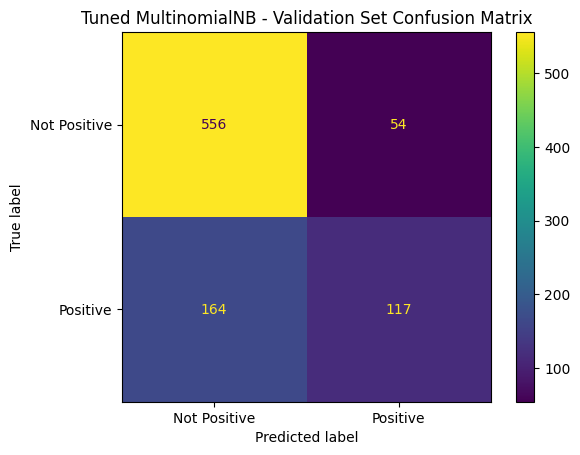

___VS___

Tuned XG Boost Model Results
Best XG Boost Hyperparameters: {'tfidf__max_df': 0.65, 'tfidf__max_features': 2000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None, 'tfidf__sublinear_tf': True, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1}
Best XG Boost Train Cross-Validation Score: 0.7257
Validation Set Accuracy: 0.7677


Classification Report (Tuned XG Boost Model):
              precision    recall  f1-score   support

Not Positive       0.79      0.90      0.84       610
    Positive       0.68      0.49      0.57       281

    accuracy                           0.77       891
   macro avg       0.74      0.69      0.71       891
weighted avg       0.76      0.77      0.76       891



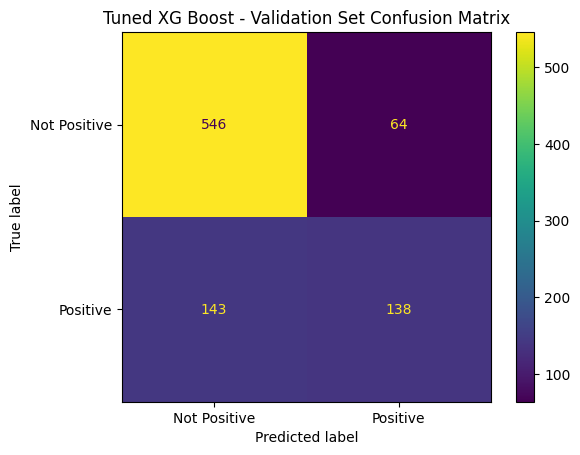

In [21]:
#defines the Hyper Parameter Tuning XG Boost Classifier pipeline 
XGB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('xgb', XGBClassifier(random_state=24, 
                          eval_metric='logloss'))])

#make a parameter grid for the XG Boost hyperparameter options
XGB_param_grid = {
    #[2000, 2500, 3000, 3500, 4000]
    'tfidf__max_features': [2000, 3500],
    #[(1, 1), (1,2), (1,3), (1,5)]
    'tfidf__ngram_range': [(1,1), (1,2)],
    #[0.0, 0.1, 0.01, 0.001, 0.0001, 2, 10]
    'tfidf__min_df': [ 2, 10],
    #[0.85, 0.95, 1.0, 0.65, 0.75]
    'tfidf__max_df': [0.65, 0.75],
    #[stopwords_list2, stopwords_list, 'english', None]
    'tfidf__stop_words': [stopwords_list, None],
    'tfidf__sublinear_tf': [True, False],
    #[175, 200, 225, 100]
    'xgb__n_estimators': [200, 100],                   #number of boosting rounds
    #[3, 4, 5, 6]
    'xgb__max_depth': [4, 5],                          #maximum depth of trees
    #[0.2, 0.3, 0.4, 0.5]
    'xgb__learning_rate': [0.3, 0.2],                  #step size for updates
    #[0, 1, 2, 3]
    'xgb__scale_pos_weight': [0, 1]}                   #weight of positive class to handle imbalance

#run a grid search to find the most accurate vectorization and model version
XGB_grid_search = GridSearchCV(
    XGB_pipeline,
    XGB_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,                                         #use all available CPU cores for parallel processing
    verbose=1)                                         #show extent of search

#fits the model on the training data
XGB_grid_search.fit(X_train_str, y_train)

#performs 5-fold cross-validation on the training data
best_train_cv_score_xgb = XGB_grid_search.best_score_

#gets best cross-validation model
best_model_xgb = XGB_grid_search.best_estimator_

#predicts sentiment on the validation set
y_val_pred_xgb = best_model_xgb.predict(X_val_str)

#calculates accuracy on the validation set
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)

#gets the best hyperparameter values for the highest accuracy
best_params_xgb = XGB_grid_search.best_params_

#display the previous best Model's results
print("Previous Best Model Results: Tuned Multinomial Naive Bayes")
print(f"Tuned  Multiple Niave Bayes Train Cross-Validation Score: {MNB_best_train_cv_score:.4f}")
print(f"Tuned Validation Set Accuracy: {MNB_val_accuracy:.4f}\n")

#generate and display the previous best Model's confusion Matrix
Tuned_MNB_matrix.plot()
plt.title("Tuned MultinomialNB - Validation Set Confusion Matrix")
plt.show()

print("___VS___\n")

#display this tuned Model's results
print("Tuned XG Boost Model Results")
print(f"Best XG Boost Hyperparameters: {best_params_xgb}")
print(f"Best XG Boost Train Cross-Validation Score: {best_train_cv_score_xgb:.4f}")
print(f"Validation Set Accuracy: {val_accuracy_xgb:.4f}\n")

#display the Model's classification report
print("\nClassification Report (Tuned XG Boost Model):")
print(classification_report(y_val, y_val_pred_xgb, target_names=['Not Positive', 'Positive']))

#generate and display the tuned Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred_xgb)
Tuned_XGB_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
Tuned_XGB_matrix.plot()
plt.title("Tuned XG Boost - Validation Set Confusion Matrix")
plt.show()

The tuned XG Boost Classifier outperforms the tuned Multinomial Naive Bayes model, earning a higher validation accuracy (0.7677 vs. 0.7533) and cross-validation score (0.7257 vs. 0.7156). It also improves the "Positive" class recall (0.49 vs. 0.41) and F1-score (0.57 vs. 0.52), making it more effective at detecting positive sentiment. The tuned XG Boost model does not show an improvement in precision from the tuned Multinomial Naive Bayes model (0.68). The XGB model seems to be the best at predicting positive sentiment so far, but let us keep looking. 

### Linear SVC

#### Linear SVC Grid Search

Previous Best Model Results: Tuned XG Boost
Best XG Boost Train Cross-Validation Score: 0.7257
Validation Set Accuracy: 0.7677



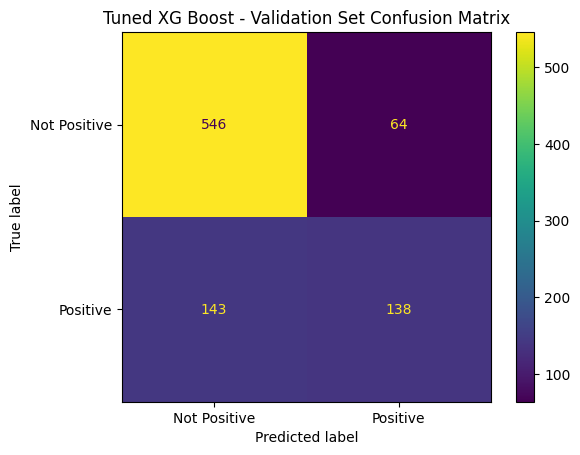

___VS___

Tuned Linear SVC Model Results
Best Linear SVC Hyperparameters: {'lsvc__C': 1, 'lsvc__loss': 'squared_hinge', 'lsvc__penalty': 'l2', 'lsvc__tol': 0.1, 'tfidf__max_df': 0.95, 'tfidf__max_features': 3500, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None, 'tfidf__sublinear_tf': True}
Tuned Linear SVC Train Cross-Validation Score: 0.7271
Validation Set Accuracy: 0.7744


Classification Report (Tuned Linear SVC Model):
              precision    recall  f1-score   support

Not Positive       0.82      0.86      0.84       610
    Positive       0.66      0.59      0.62       281

    accuracy                           0.77       891
   macro avg       0.74      0.73      0.73       891
weighted avg       0.77      0.77      0.77       891



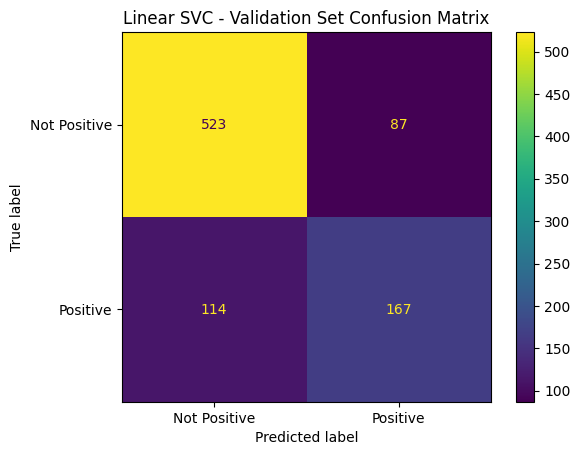

In [22]:
#defines the Hyper Parameter Tuning Linear SVC pipeline 
LSVC_pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lsvc', LinearSVC(random_state=24, 
                       dual=True))])

#make a parameter grid for the Linear SVC hyperparameter options
LSVC_param_grid1 = {
    #[2000, 2500, 3000, 3500, 4000]
    'tfidf__max_features': [2000, 3500],
    #[(1, 1), (1,2), (1,3), (1,5)]
    'tfidf__ngram_range': [(1, 1), (1,2)],
    #[0.0, 0.1, 0.01, 0.001, 0.0001, 2, 10]
    'tfidf__min_df': [0.0, 0.01],
    #[0.85, 0.95, 1.0, 0.65, 0.75]
    'tfidf__max_df': [0.95, 0.85],
    #[stopwords_list2, stopwords_list, 'english', None]
    'tfidf__stop_words': [stopwords_list, None],
    'tfidf__sublinear_tf': [True, False],
    #[0.001, 0.01, 0.1, 1, 10, 100]
    'lsvc__C': [1,10],                                           #Regularization parameter
    'lsvc__penalty': ['l2', 'l1'],                               #regularization penatly type
    #['hinge', 'squared_hinge']
    'lsvc__loss': ['squared_hinge'],                             #loss function
    #[1e-4, 1e-3, 1e-2, 1e-1, 10]
    'lsvc__tol': [1e-1, 10]}                                     #stopping criteria tolerance

#run a grid search to find the most accurate vectorization and model version    
LSVC_grid_search1 = GridSearchCV(
    LSVC_pipeline1,
    LSVC_param_grid1,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose=0)

#fits the model on the training data
LSVC_grid_search1.fit(X_train_str, y_train)

#performs 5-fold cross-validation on the training data
LSVC_best_train_cv_score = LSVC_grid_search1.best_score_

#gets best cross-validation model
LSVC_best_model = LSVC_grid_search1.best_estimator_

#predicts sentiment on the validation set
y_val_pred = LSVC_best_model.predict(X_val_str)

#calculates accuracy on the validation set
LSVC_val_accuracy = accuracy_score(y_val, y_val_pred)

#gets the best hyperparameter values for the highest accuracy
LSVC_best_params = LSVC_grid_search1.best_params_

#display the previous best Model's results
print("Previous Best Model Results: Tuned XG Boost")
print(f"Best XG Boost Train Cross-Validation Score: {best_train_cv_score_xgb:.4f}")
print(f"Validation Set Accuracy: {val_accuracy_xgb:.4f}\n")

#generate and display the previous best Model's confusion Matrix
Tuned_XGB_matrix.plot()
plt.title("Tuned XG Boost - Validation Set Confusion Matrix")
plt.show()

print("___VS___\n")

#display this tuned Model's results
print("Tuned Linear SVC Model Results")
print(f"Best Linear SVC Hyperparameters: {LSVC_best_params}")
print(f"Tuned Linear SVC Train Cross-Validation Score: {LSVC_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {LSVC_val_accuracy:.4f}\n")

#display the Model's classification report
print("\nClassification Report (Tuned Linear SVC Model):")
print(classification_report(y_val, y_val_pred, target_names=['Not Positive', 'Positive']))

#generate and display the tuned Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
Tuned_LSVC_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
Tuned_LSVC_matrix.plot()
plt.title("Linear SVC - Validation Set Confusion Matrix")
plt.show()

The Tuned Linear SVC model slightly outperforms the Tuned XG Boost model, with a validation accuracy of 0.7744 (vs. 0.7677 for XGB) and improved "Positive" class recall (0.59 vs. 0.49) and F1-score (0.62 vs. 0.57), making it more effective at detecting positive sentiment. It sacrifices some precision (0.66 vs. 0.68) and has a nearly identical cross-validation score (0.7271 vs. 0.7257). The Linear SVC is now the best-performing model for this sentiment classification task, but I will explore the other models to see if anything can out perform this. 

### Random Forest

#### Random Forest Grid Search

Previous Best Model Results: Tuned Linear SVC
Best Linear SVC Train Cross-Validation Score: 0.7271
Validation Set Accuracy: 0.7744



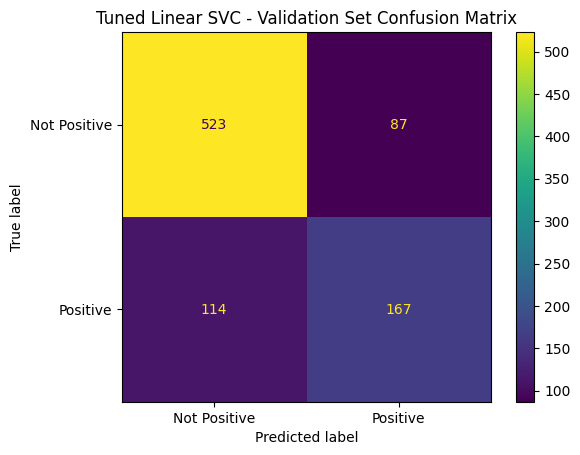

___VS___

Tuned Random Forest Classifier Results
Random Forest Classifier Best Hyperparameters: {'rfc__bootstrap': True, 'rfc__max_depth': None, 'rfc__max_features': 'sqrt', 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 150, 'tfidf__max_df': 0.95, 'tfidf__max_features': 2000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None, 'tfidf__sublinear_tf': True}
Tuned Random Forest Classifier Train Cross-Validation Score: 0.7281
Validation Set Accuracy: 0.7643


Classification Report (Tuned Random Forest Model):
              precision    recall  f1-score   support

Not Positive       0.78      0.91      0.84       610
    Positive       0.70      0.44      0.54       281

    accuracy                           0.76       891
   macro avg       0.74      0.68      0.69       891
weighted avg       0.76      0.76      0.75       891



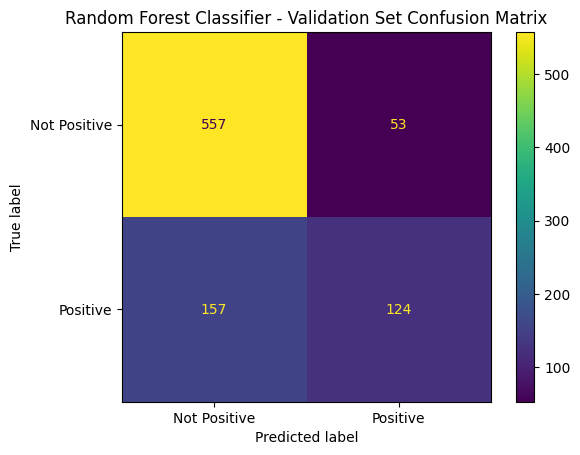

In [23]:
#defines the Hyper Parameter Tuning Random Forest pipeline 
RF_pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rfc', RandomForestClassifier(random_state=24))])

#make a parameter grid for the Random Forest hyperparameter options
RF_param_grid1 = {
    #[2000, 2500, 3000, 3500, 4000]
    'tfidf__max_features': [2000],
    #[(1, 1), (1,2), (1,3), (1,5)]
    'tfidf__ngram_range': [(1,2)],
    #[0.0, 0.1, 0.01, 0.001, 0.0001, 2, 10]
    'tfidf__min_df': [2],
    #[0.85, 0.95, 1.0, 0.65, 0.75]
    'tfidf__max_df': [0.95],
    #[stopwords_list2, stopwords_list, 'english', None]
    'tfidf__stop_words': [None],
    #[True, False]
    'tfidf__sublinear_tf': [True],
    #[100, 150, 200, 250]
    'rfc__n_estimators': [100, 150],                            #number of trees in the forest
    #[10, 20, None]
    'rfc__max_depth': [None],                                   #maximum depth of the trees
    #[2, 5, 10, 15]
    'rfc__min_samples_split': [10, 15],                         #min samples required to split a node
    'rfc__min_samples_leaf': [1, 2],                            #min samples required at leaf node
    #['sqrt', 'log2', None]
    'rfc__max_features': ['sqrt'],                              #number of features considered at each split
    #[True, False]
    'rfc__bootstrap': [True]}                                   #use bootstrap samples?

#run a grid search to find the most accurate vectorization and model version
RF_grid_search1 = GridSearchCV(
    RF_pipeline1,
    RF_param_grid1,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose=0)


#fits the model on the training data
RF_grid_search1.fit(X_train_str, y_train)

#performs 5-fold cross-validation on the training data
RF_best_train_cv_score = RF_grid_search1.best_score_

#gets best cross-validation model
RF_best_model = RF_grid_search1.best_estimator_

#predicts sentiment on the validation set
y_val_pred = RF_best_model.predict(X_val_str)

#calculates accuracy on the validation set
RF_val_accuracy = accuracy_score(y_val, y_val_pred)

#gets the best hyperparameter values for the highest accuracy
RF_best_params = RF_grid_search1.best_params_

#display the previous best Model's results
print("Previous Best Model Results: Tuned Linear SVC")
print(f"Best Linear SVC Train Cross-Validation Score: {LSVC_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {LSVC_val_accuracy:.4f}\n")

#generate and display the previous best Model's confusion Matrix
Tuned_LSVC_matrix.plot()
plt.title("Tuned Linear SVC - Validation Set Confusion Matrix")
plt.show()

print("___VS___\n")

#display this tuned Model's results
print("Tuned Random Forest Classifier Results")
print(f"Random Forest Classifier Best Hyperparameters: {RF_best_params}")
print(f"Tuned Random Forest Classifier Train Cross-Validation Score: {RF_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {RF_val_accuracy:.4f}\n")

#display the Model's classification report
print("\nClassification Report (Tuned Random Forest Model):")
print(classification_report(y_val, y_val_pred, target_names=['Not Positive', 'Positive']))

#generate and display the tuned Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
Tuned_RFC_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
Tuned_RFC_matrix.plot()
plt.title("Random Forest Classifier - Validation Set Confusion Matrix")
plt.show()

The Tuned Random Forest Classifier results in a validation accuracy of 0.7643, slightly lower than the Tuned Linear SVC’s 0.7744. It improves precision for the "Positive" class (0.70 vs. 0.66) and reduces false positives (53 vs. 87), but its recall (0.44 vs. 0.59) and F1-score (0.54 vs. 0.62) for the "Positive" class are worse, indicating less effectiveness at detecting positive sentiment. The cross-validation scores are similar (0.7281 vs. 0.7271). The Linear SVC model still remains the best model for correctly classifying positive sentiment in tweets. 

Let's move on to the Gradient Boosting model. 

### Gradient Boosting

#### Gradfient Boosting Grid Search

Previous Best Model Results: Tuned Linear SVC
Best Linear SVC Train Cross-Validation Score: 0.7271
Validation Set Accuracy: 0.7744



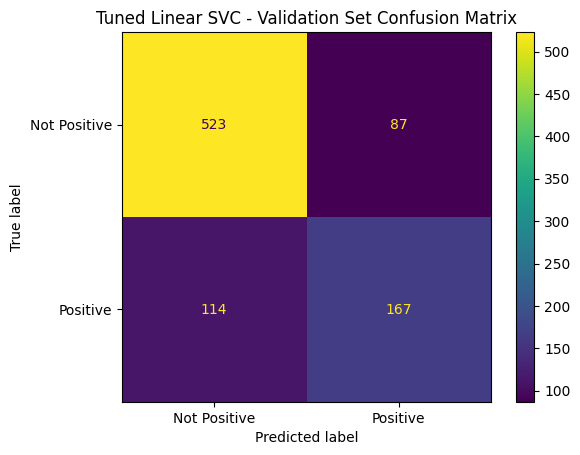

___VS___

Tuned Gradient Boosting Classifier Results
Best Gradient Boosting Classifier Hyperparameters: {'gbc__learning_rate': 0.1, 'gbc__loss': 'exponential', 'gbc__max_depth': 7, 'gbc__min_samples_leaf': 4, 'gbc__min_samples_split': 2, 'gbc__n_estimators': 300, 'gbc__subsample': 0.8, 'tfidf__max_df': 0.95, 'tfidf__max_features': 4000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None, 'tfidf__sublinear_tf': True}
Tuned Gradient Boosting Calssifier Train Cross-Validation Score: 0.7323
Validation Set Accuracy: 0.7542

Classification Report (Tuned Gradient Boosting Model):
              precision    recall  f1-score   support

Not Positive       0.77      0.91      0.83       610
    Positive       0.68      0.42      0.52       281

    accuracy                           0.75       891
   macro avg       0.72      0.67      0.68       891
weighted avg       0.74      0.75      0.74       891



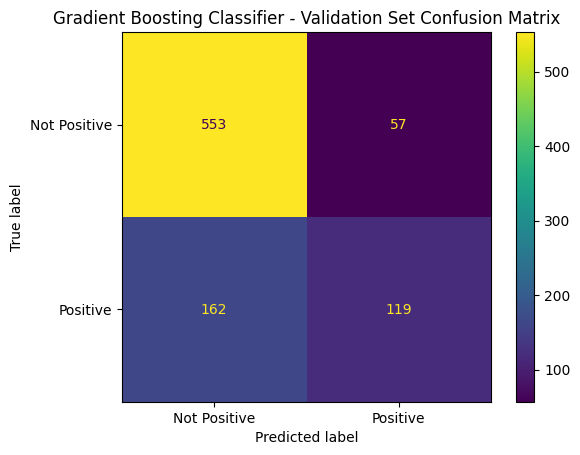

In [24]:
#defines the Hyper Parameter Tuning Gradient Boosting pipeline 
GB_pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('gbc', GradientBoostingClassifier(random_state=24))])

#make a parameter grid for the Gradient Boosting hyperparameter options
GB_param_grid1 = {
    #[2000, 2500, 3000, 3500, 4000]
    'tfidf__max_features': [4000],
    #[(1, 1), (1,2), (1,3), (1,5)]
    'tfidf__ngram_range': [(1, 1)],
    #[0.0, 0.1, 0.01, 0.001, 0.0001, 2, 10]
    'tfidf__min_df': [2],
    #[0.85, 0.95, 1.0, 0.65, 0.75]
    'tfidf__max_df': [0.95],
    #[stopwords_list2, stopwords_list, 'english', None]
    'tfidf__stop_words': [None],
    #[True, False]
    'tfidf__sublinear_tf': [True],
    #100, 200, 300, 400]
    'gbc__n_estimators': [300, 400],                           #number of boosting stages
    #[0.01, 0.05, 0.1, 0.2]
    'gbc__learning_rate': [0.1, 0.2],                          #step size for updates
    #[3, 4, 5, 6, 7]
    'gbc__max_depth': [6, 7],                                  #max depth for trees
    #[0.7, 0.8, 0.9, 1.0]
    'gbc__subsample': [0.7, 0.8],                              #fraction of samples used for fitting
    #[2, 3, 10]
    'gbc__min_samples_split': [2, 3],                          #min samples required to split a node
    #[1, 4, 5]
    'gbc__min_samples_leaf': [4, 5],                           #min samples required at leaf node
    #['deviance', 'exponential']
    'gbc__loss': ['exponential']}                              #loss function to optimize

#run a grid search to find the most accurate vectorization and model version
GB_grid_search1 = GridSearchCV(
    GB_pipeline1,
    GB_param_grid1,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose=0)

#fits the model on the training data
GB_grid_search1.fit(X_train_str, y_train)

#performs 5-fold cross-validation on the training data
GB_best_train_cv_score = GB_grid_search1.best_score_

#gets best cross-validation model
GB_best_model = GB_grid_search1.best_estimator_

#predicts sentiment on the validation set
y_val_pred = GB_best_model.predict(X_val_str)

#calculates accuracy on the validation set
GB_val_accuracy = accuracy_score(y_val, y_val_pred)

#gets the best hyperparameter values for the highest accuracy
GB_best_params = GB_grid_search1.best_params_

#display the previous best Model's results
print("Previous Best Model Results: Tuned Linear SVC")
print(f"Best Linear SVC Train Cross-Validation Score: {LSVC_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {LSVC_val_accuracy:.4f}\n")

#generate and display the previous best Model's confusion Matrix
Tuned_LSVC_matrix.plot()
plt.title("Tuned Linear SVC - Validation Set Confusion Matrix")
plt.show()

print("___VS___\n")

#display this tuned Model's results
print("Tuned Gradient Boosting Classifier Results")
print(f"Best Gradient Boosting Classifier Hyperparameters: {GB_best_params}")
print(f"Tuned Gradient Boosting Calssifier Train Cross-Validation Score: {GB_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {GB_val_accuracy:.4f}")

#display the Model's classification report
print("\nClassification Report (Tuned Gradient Boosting Model):")
print(classification_report(y_val, y_val_pred, target_names=['Not Positive', 'Positive']))

#generate and display the tuned Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
Tuned_GBC_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
Tuned_GBC_matrix.plot()
plt.title("Gradient Boosting Classifier - Validation Set Confusion Matrix")
plt.show()

The Tuned Gradient Boosting Classifier results in a validation accuracy of 0.7542, which is lower than the Tuned Linear SVC’s 0.7744. It underperforms in "Positive" class recall (0.42 vs. 0.59) and F1-score (0.52 vs. 0.62), making it less effective at detecting positive sentiment. However, it improves precision (0.68 vs. 0.66) and reduces false positives (57 vs. 87), with a slightly lower cross-validation score (0.7232 vs. 0.7271). The Linear SVC model still remains the best model for correctly classifying positive sentiment in tweets. 

Let's move onto the final model MLP Classifier. 

### MLP Classifier

#### MLP Classifier Grid Search

Previous Best Model Results: Tuned Linear SVC
Best Linear SVC Train Cross-Validation Score: 0.7271
Validation Set Accuracy: 0.7744



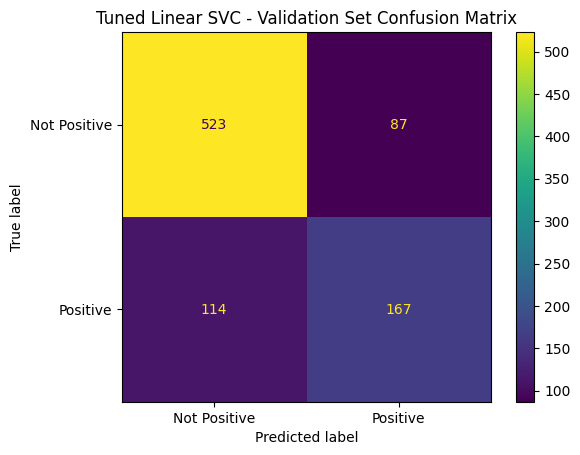

___VS___

Tuned MLP Classifier Results
Best MLP Classifier Hyperparameters: {'mlpc__activation': 'relu', 'mlpc__hidden_layer_sizes': (100,), 'mlpc__max_iter': 500, 'mlpc__solver': 'adam', 'tfidf__max_df': 0.85, 'tfidf__max_features': 1250, 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None, 'tfidf__sublinear_tf': True}
Tuned MLP Classifier Train Cross-Validation Score: 0.7114
Validation Set Accuracy: 0.7295

Classification Report (Tuned MLP Classifier Model):
              precision    recall  f1-score   support

Not Positive       0.82      0.78      0.80       610
    Positive       0.56      0.62      0.59       281

    accuracy                           0.73       891
   macro avg       0.69      0.70      0.69       891
weighted avg       0.74      0.73      0.73       891



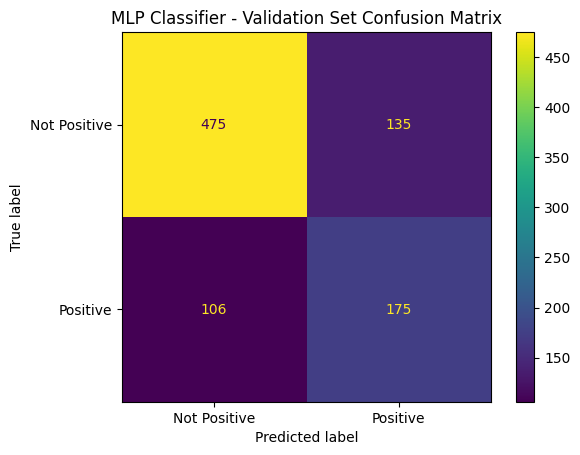

In [25]:
#defines the Hyper Parameter Tuning MLP Classifier pipeline 
MLPC_pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mlpc', MLPClassifier(random_state=24))])

#make a parameter grid for the MLP Classifier hyperparameter options
MLPC_param_grid1 = {
    #[2000, 2500, 3000, 3500, 4000]
    'tfidf__max_features': [1250],
    #[(1, 1), (1,2), (1,3), (1,5)]
    'tfidf__ngram_range': [(1, 1)],
    #[0.0, 0.1, 0.01, 0.001, 0.0001, 2, 10]
    'tfidf__min_df': [0.001],
    #[0.85, 0.95, 1.0, 0.65, 0.75]
    'tfidf__max_df': [0.85],
    #[stopwords_list2, stopwords_list, 'english', None]
    'tfidf__stop_words': [None],
    #[True, False]
    'tfidf__sublinear_tf': [True],
    'mlpc__max_iter': [500, 600],                            #max number of iterations
    'mlpc__hidden_layer_sizes': [(50,), (100,)],             #number of neurons in hidden layers
    'mlpc__activation': ['relu'],                            #activation function
    'mlpc__solver': ['adam']}                                #optimization algorithm

#run a grid search to find the most accurate vectorization and model version
MLPC_grid_search1 = GridSearchCV(
    MLPC_pipeline1,
    MLPC_param_grid1,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose=0)

#fits the model on the training data
MLPC_grid_search1.fit(X_train_str, y_train)

#performs 5-fold cross-validation on the training data
MLPC_best_train_cv_score = MLPC_grid_search1.best_score_

#gets best cross-validation model
MLPC_best_model = MLPC_grid_search1.best_estimator_

#predicts sentiment on the validation set
y_val_pred = MLPC_best_model.predict(X_val_str)

#calculates accuracy on the validation set
MLPC_val_accuracy = accuracy_score(y_val, y_val_pred)

#gets the best hyperparameter values for the highest accuracy
MLPC_best_params = MLPC_grid_search1.best_params_

#display the previous best Model's results
print("Previous Best Model Results: Tuned Linear SVC")
print(f"Best Linear SVC Train Cross-Validation Score: {LSVC_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {LSVC_val_accuracy:.4f}\n")

#generate and display the previous best Model's confusion Matrix
Tuned_LSVC_matrix.plot()
plt.title("Tuned Linear SVC - Validation Set Confusion Matrix")
plt.show()

print("___VS___\n")

#display this tuned Model's results
print("Tuned MLP Classifier Results")
print(f"Best MLP Classifier Hyperparameters: {MLPC_best_params}")
print(f"Tuned MLP Classifier Train Cross-Validation Score: {MLPC_best_train_cv_score:.4f}")
print(f"Validation Set Accuracy: {MLPC_val_accuracy:.4f}")

#display the Model's classification report
print("\nClassification Report (Tuned MLP Classifier Model):")
print(classification_report(y_val, y_val_pred, target_names=['Not Positive', 'Positive']))

#generate and display the tuned Model's confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
Tuned_MLPC_matrix = ConfusionMatrixDisplay(cm_val, display_labels=['Not Positive', 'Positive'])
Tuned_MLPC_matrix.plot()
plt.title("MLP Classifier - Validation Set Confusion Matrix")
plt.show()

The Tuned MLP Classifier resulted in a validation accuracy of approximately 0.7295, which is lower than the Tuned Linear SVC’s 0.7744. It slightly improves "Positive" class recall (0.62 vs. 0.59) but underperforms in precision (0.56 vs. 0.66), F1-score (0.59 vs. 0.62), and overall accuracy, with more false positives (135 vs. 87). The cross-validation score is also lower (0.7114 vs. 0.7271). The Linear SVC model still remains the best model for correctly classifying positive sentiment in tweets.

## Model Results

Now that I have finished tuning and running all the different sentiment classification models, I will graph all of their validation accuracy scores together on a line plot to make it easy to tell which model is best at predicting the sentiment of new tweets. 

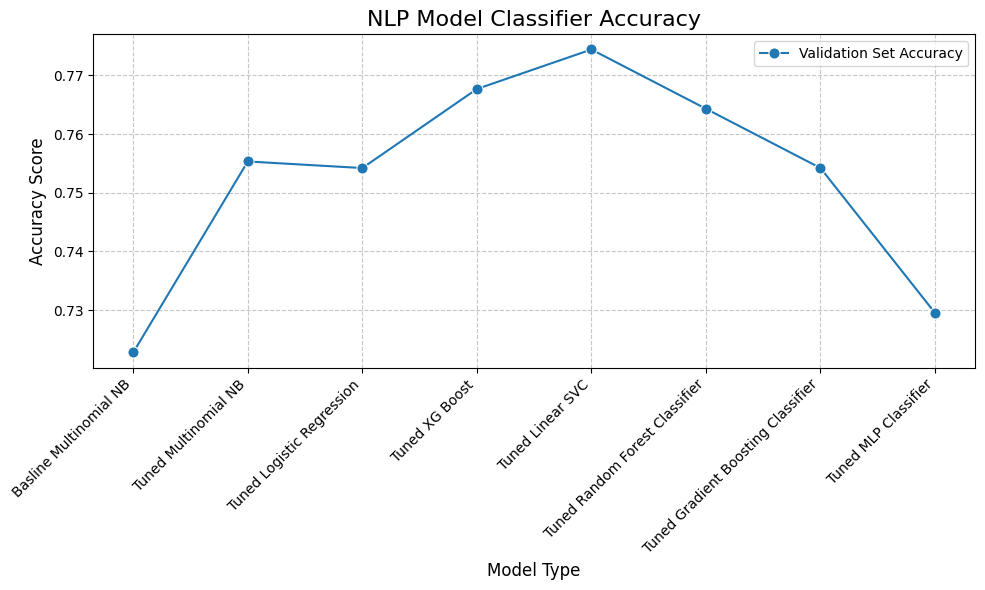

In [26]:
#makes a tuple list of each of the models and their associated validation accuracy scores
model_results= [('Basline Multinomial NB', BMNB_val_accuracy),
                ('Tuned Multinomial NB', MNB_val_accuracy),
                ('Tuned Logistic Regression', LR_val_accuracy),
                ('Tuned XG Boost', val_accuracy_xgb),
                ('Tuned Linear SVC', LSVC_val_accuracy),
                ('Tuned Random Forest Classifier', RF_val_accuracy),
                ('Tuned Gradient Boosting Classifier', GB_val_accuracy),
                ('Tuned MLP Classifier', MLPC_val_accuracy)]

#unzip model names and accuracies for Dataframe creation
model_names, accuracies = zip(*model_results)

#create a Dateframe storing model names and accuracies
df_scores = pd.DataFrame({
    'Model Type': model_names,
    'Accuracy Score': accuracies})

#create a lineplot for the model accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Type', y='Accuracy Score', data=df_scores, marker='o', 
             markersize=8, label='Validation Set Accuracy')

plt.title('NLP Model Classifier Accuracy', fontsize=16)
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

The Tuned Linear SVC achieves the highest validation accuracy ~0.774, outperforming all other models, including Tuned XG Boost ~0.767, Tuned Random Forest Classifier ~0.764, Tuned Gradient Boosting Classifier ~0.754, and Tuned MLP Classifier ~0.73. The Baseline Multinomial NB and Tuned MLP Classifier have the lowest accuracies ~0.73. 

I will run the optimized TF-IDF Vectorization and Linear SVC model on the holdout data to simulate how it will perform on new tweets that our marketing team will feed into it. 

## Final Test

Final Test Set Accuracy (Tuned Linear SVC Model): 0.7410

Classification Report (Tuned Linear SVC Model):
              precision    recall  f1-score   support

Not Positive       0.79      0.84      0.81       597
    Positive       0.62      0.55      0.58       295

    accuracy                           0.74       892
   macro avg       0.71      0.69      0.70       892
weighted avg       0.73      0.74      0.74       892



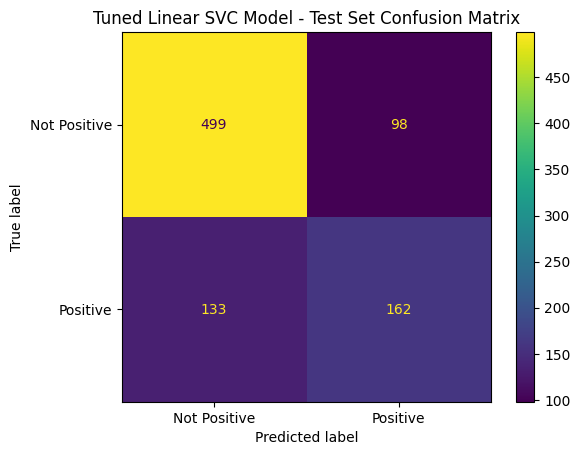

In [27]:
#defines the final test pipeline
SVC_line = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3500,
                              ngram_range=(1, 1),
                              min_df=0.0,
                              max_df=0.95, 
                              use_idf=True,
                              stop_words=None,
                              sublinear_tf=True)),
    ('LSVC', LinearSVC(random_state=24,
                       C=1,
                       penalty='l2',
                       loss='squared_hinge',
                       tol=1e-1))])

#fits the model on the test data
SVC_line.fit(X_train_str, y_train)

#predicts sentiment on the test set
y_test_pred_SVC = SVC_line.predict(X_test_str)

#calculates accuracy on the test set
test_accuracy_SVC = accuracy_score(y_test, y_test_pred_SVC)

#generates test set confusion matrix
cm_test_SVC = confusion_matrix(y_test, y_test_pred_SVC)

#display test model's results and classification report
print(f"Final Test Set Accuracy (Tuned Linear SVC Model): {test_accuracy_SVC:.4f}")
print("\nClassification Report (Tuned Linear SVC Model):")
print(classification_report(y_test, y_test_pred_SVC, target_names=['Not Positive', 'Positive']))

#display test model's confusion matrix
Test_SVC_Matrix = ConfusionMatrixDisplay(cm_test_SVC, display_labels=['Not Positive', 'Positive'])
Test_SVC_Matrix.plot()
plt.title("Tuned Linear SVC Model - Test Set Confusion Matrix")
plt.show()

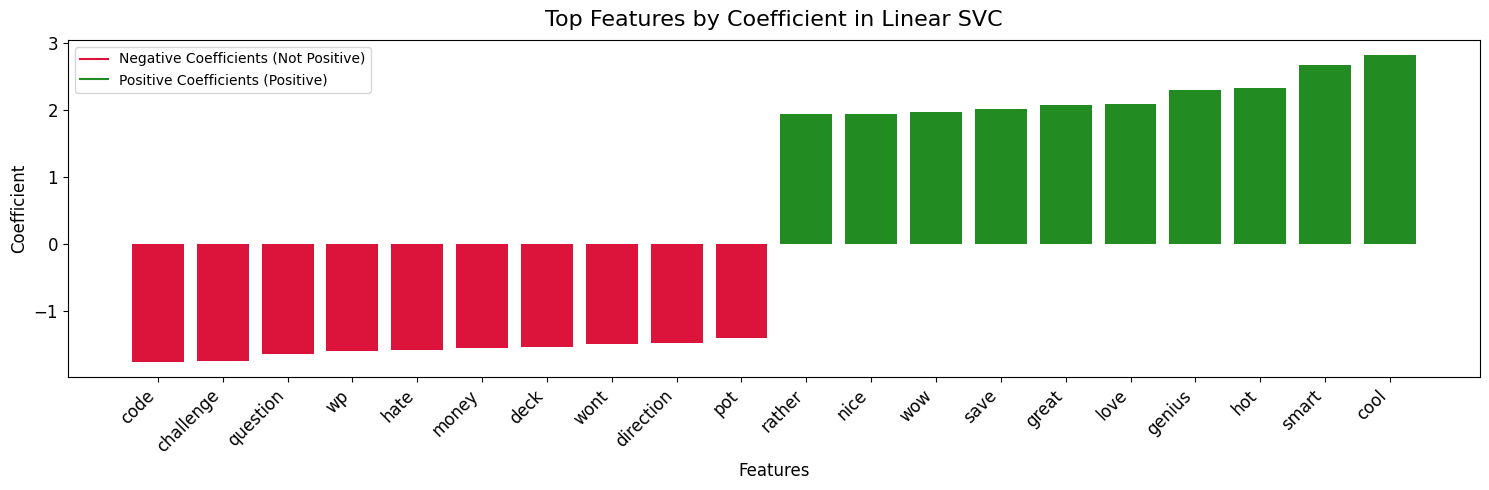

In [28]:
#function that displays what tokens the model deems as most important when classifying sentiment
def top_coefficients(classifier, feature_names, top_features=10): #displays top 10 tokens for each sentiment
    #get coefficients from classifier and turn into 1D array
    coef = classifier.coef_.ravel()
    #gather indices of top positive and negative coefficients, then combine into an array
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients,
                                  top_positive_coefficients])

    #plot a color coded bar chart for the top X amount of tokens
    plt.figure(figsize=(15, 5))
    colors = ["crimson" if c < 0 else 'forestgreen' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    
    #turn feature names into axis ticks
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(2 * top_features),
               feature_names[top_coefficients],
               rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    #provide graph and axis titles
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Coefficient', fontsize=12)
    plt.title('Top Features by Coefficient in Linear SVC', fontsize=16, pad=10)
    
    #create a custom legend for positive and negative sentiment tokens
    legend_elements = [Line2D([0], [0], color='crimson', 
                              label='Negative Coefficients (Not Positive)'),
                       Line2D([0], [0], color='forestgreen', 
                              label='Positive Coefficients (Positive)')]    
    plt.legend(handles=legend_elements, loc='best', fontsize=10)
    
    plt.tight_layout()
    plt.show()

#call the function on the final test model
top_coefficients(SVC_line['LSVC'], 
                 SVC_line['tfidf'].get_feature_names_out(),
                 top_features=10)

I can tell that based off of the words that this model is focusing on that it has successfully focused in on meaningful features instead of sentiment free words like "iphone".

## Conclusions

My conclusion from this analysis is that our marketing team could use binary classification via supervised machine learning to implement an automated process for identifying positive sentiment tweets, reducing the need for manual review and potentially improving their efficiency in monitoring how customers are feeling about specific products like iphones and ipads on Twitter.

In this specific use case, the Tuned Linear SVC classification model can be used to analyze tweets in real-time or in batches as they are collected from Twitter. If the classifier determines a tweet expresses positive sentiment, it can flag the tweet for the marketing team to review for potential marketing opportunities, such as responding to positive feedback or sharing it in promotional materials.

Since accuracy was the requested optimized metric for success, with precision and recall as secondary considerations to balance the trade-off between identifying positive tweets and minimizing errors, we can highlight the following three (3) factors:

1) High Overall Accuracy for Reliable Automation: Given this model’s accuracy rating of 74.10% on the test set data, we can say that the Tuned Linear SVC is moderately reliable at correctly classifying the sentiment of tweets as either "Positive" or "Not Positive." This means that 74.1% of the time, the model accurately identifies the sentiment of a tweet, allowing the marketing team to automate the initial filtering process and focus their efforts on a smaller subset of tweets. While this accuracy is not as high as desired for full automation, it still significantly reduces the manual workload by correctly classifying 661 out of 892 tweets, saving the team from reviewing all tweets by hand.

2) Moderate Precision for Positive Sentiment Identification: Given this model’s precision rating of 62% for the "Positive" class on the test set data, we can say that when the model predicts a tweet to be positive, there is a moderate likelihood that it actually expresses positive sentiment. This means that out of all the tweets the model flags as "Positive," 38% are actually "Not Positive" (98 out of 260 predicted positives). For the marketing team, this implies that while the model helps narrow down the pool of tweets to review (from 892 to 260), they will still need to manually verify the flagged tweets to filter out the 38% false positives. However, this is a manageable trade-off, as it significantly reduces the number of tweets requiring manual review.

3) Moderate Recall for Capturing Positive Sentiment: Given this model’s recall rating of 55% for the "Positive" class on the test set data, we can say that the model is decent at identifying positive tweets but misses a significant portion. This means that out of all the tweets that are actually positive, the model correctly classifies 55% of them (162 out of 295), while 45% (133 tweets) are incorrectly classified as "Not Positive." For the marketing team, this indicates that while the model captures over half of the positive tweets, they may miss nearly half of the opportunities to engage with positive sentiment unless they manually review the "Not Positive" predictions. To address this, the team could implement a secondary manual review process for the 632 tweets predicted as "Not Positive," focusing on the 133 missed positives, which still reduces the overall manual effort compared to reviewing all tweets.

To deal with these lower precision and recal scores, we could go back and change the metric for success to a hybrid between accuracy and precision. By putting precision at a higher priority, it could decrease the amount of "Not Positive" tweets falsely classified as "Positive" potentially leading to a fully automated process instead of just decreasing the amount of tweets our marketing team needs to review. Doing this could also decrease the recall of the model, leading to more undiscovered "Positive" tweets falling through the cracks. Alternatively prioritizing Recall over precision could have the opposite effect where more "Positive" sentiment tweets are sucked up, decreasing the amount that are missed, but with that more false "Positive" tweets may be sucked up as well.


## Next Steps

Here are three potential next steps our company can implement to further assist our marketing team.

1) Instead of searching for "Positive" sentiment, we could search for "Negative" sentiment. These tweets could then be used to put together a profile on how these products and services could be improved in future iterations.

2) Instead of having our marketing team manually pull down tweets for analysis one by one, I could set up an API that automatically pulls down tweets and classifies their sentiment, further decreasing the amount of manual work our marketing team has to do.

3) Perform unsupervised clustering on "Positive" predictions to create feedback segmentation that can be used to group together common areas of discussion about different aspects of these products. These tweet clusters can then be presented to the marketing team for targeted analysis of current product features. 